In [2]:
import torch
import copy
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torch import optim
from torch import nn
from torch.nn import functional as F

from collections import OrderedDict

import argparse
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [76]:
def load_data(num_data=None, avg=False): 
    if num_data == None:
        ldt_loss = pd.read_csv(f"paper_data/[loss]Normal_FL.csv")
        ldt_acc = pd.read_csv(f"paper_data/[acc]Normal_FL.csv")
        
    else:
        if avg==False:
            ldt_loss = pd.read_csv(f"paper_data/[loss]Non_Avg_FL_{num_data}.csv")
            ldt_acc = pd.read_csv(f"paper_data/[acc]Non_Avg_FL_{num_data}.csv")

        else:
            ldt_loss = pd.read_csv(f"paper_data/[loss]Avg_FL_{num_data}.csv")
            ldt_acc = pd.read_csv(f"paper_data/[acc]Avg_FL_{num_data}.csv")

    ldt_loss, ldt_acc = np.delete(ldt_loss.values, 0, 1), np.delete(ldt_acc.values, 0, 1)
    return ldt_loss, ldt_acc

def plot_loss(Normal_FL_loss, Normal_FL_acc, Non_Avg_loss, Non_Avg_acc, Avg_loss, Avg_acc):
    from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
    plt.figure(figsize=(14, 5))

    plt.subplot(1,2,1)
    plt.plot(Normal_FL_loss, label = 'FL')
    plt.plot(Non_Avg_loss, label = 'FL+AE')
    plt.plot(Avg_loss, label = 'FL+AE(w_avg)')
    plt.xlabel('Rounds')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.plot(Normal_FL_acc, label = 'FL')
    ax.plot(Non_Avg_acc, label = 'FL+AE')
    ax.plot(Avg_acc, label = 'FL+AE(w_avg)')
    ax.set_xlabel('Rounds')
    ax.set_ylabel('Accuracy')
    ax.grid()
    ax.legend()

    axins = inset_axes(ax, 1.5, 1.0, loc = 1, bbox_to_anchor=(0.725, 0.55), 
    bbox_transform = ax.figure.transFigure)
    
    axins.plot(Normal_FL_acc, label = 'FL')
    axins.plot(Non_Avg_acc, label = 'FL+AE')
    axins.plot(Avg_acc, label = 'FL+AE(w_avg)')
    axins.set_xlim(0, 150)
    axins.set_ylim(92, 93)
    mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec = "0.4")
    plt.show()

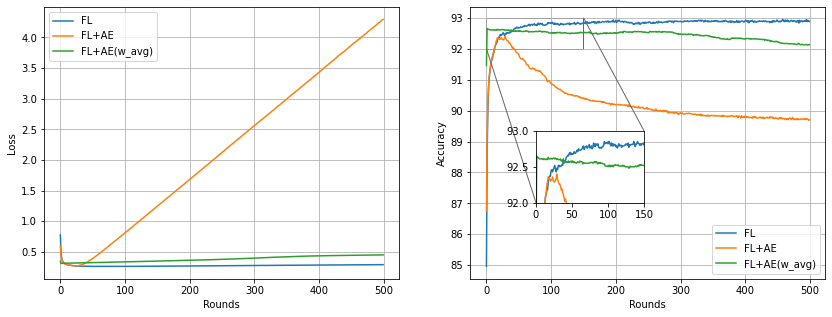

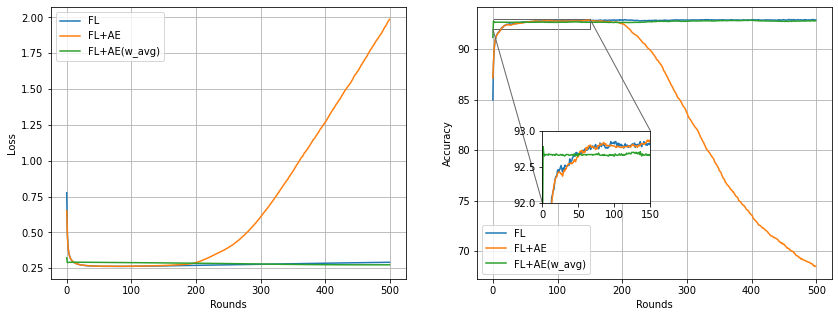

In [77]:
Normal_FL_loss, Normal_FL_acc = load_data()

for var1 in [50, 500]:
    Non_Avg_loss, Non_Avg_acc = load_data(num_data=var1, avg=False)
    Avg_loss, Avg_acc = load_data(num_data=var1, avg=True)

    plot_loss(Normal_FL_loss, Normal_FL_acc, Non_Avg_loss, Non_Avg_acc, Avg_loss, Avg_acc)